In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="white")
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
data = pd.read_csv('responses.csv')

In [4]:
data.head()

,birth,gender,sexuality,ethnicity,childhood,religion,politics,parent_edu,parent_north_amer,household_inc,parent_stem,family_funded,hs_avg,hs_extrac,hs_accel,discovery,fac_apps,industry_goal,job_search_1a,job_search_1b,job_search_2a,job_search_2b,job_search_3a,job_search_3b,industry_1a,industry_1b,industry_2a,industry_2b,industry_3a,industry_3b,city_1a,city_1b,city_2a,city_2b,city_3a,city_3b,salary_1a,currency_1a,salary_1b,currency_1b,salary_2a,currency_2a,salary_2b,currency_2b,salary_3a,currency_3a,salary_3b,currency_3b,negotiate,negotiate_add,uni_fund,company_1a,company_1b,company_2a,company_2b,company_3a,company_3b,avg_1a,avg_1b,avg_2a,avg_2b,avg_3a,avg_3b,avg_4a,avg_4b_estim,avg_4a_cumul,avg_4b_cumul_estim,rent_1a,rent_1b,rent_2a,rent_2b,rent_3a,rent_3b,rent_4a,rent_4b,stress_1a,stress_1b,stress_2a,stress_2b,stress_3a,stress_3b,stress_4a,stress_4b,attendance_1a,attendance_1b,attendance_2a,attendance_2b,attendance_3a,attendance_3b,attendance_4a,attendance_4b,years_to_finish,exchange,most_interesting,most_interesting_grade,most_useful,most_useful_grade,worst,worst_grade
0,1997,Female,Heterosexual,East Asian,KW,None,3,Technical Degree,Yes,$100 - 150k,No,25 - 50%,87.0,"Organized sports, Local volunteering, Music, Non-engineering related job",None,University open house,None,Healthcare,Waterloo Works,Waterloo Works,Waterloo Works,Waterloo Works,Networking/ Referral,Waterloo Works,Software,Software,Software,UI/UX Design,Project Management,UI/UX Design,GTA,KW,GTA,KW,GTA,GTA,20.00,cad,17.00,cad,21.0,cad,22.0,cad,20.0,cad,24.0,cad,Yes,4.0,"Family, Co-op, Student loans, High school savings, Part-time job",Software,Manufacturing,Software,Finance,Healthcare/ Biotech,Software,62.00,71.00,66.0,66.00,72.0,66.00,73.0,79.0,70.00,70.00,$500 - 600/month,$500 - 600/month,$500 - 600/month,< $500/ month,< $500/ month,$700 - 800/month,Lived at home,Lived at home,9.0,4.0,9.0,9.0,9.0,6.0,4.0,2.0,Almost always,Almost always,Almost always,Almost always,Most of the time,Most of the time,About half the time,Occasionally,5.0,None,CLAS 104,NaN,SYDE 348,NaN,SYDE 292,NaN
1,1997,Female,Heterosexual,Southeast Asian,KW,Agnostic,1,Masters,No,$50 - 100k,"Yes, engineering",0 - 25%,89.0,"Student club member, Theatre, Engineering related job",None,Family,Arts,No idea,Networking/ Referral,Networking/ Referral,Networking/ Referral,Networking/ Referral,Waterloo Works,Networking/ Referral,UI/UX Design,UI/UX Design,UI/UX Design,UI/UX Design,UI/UX Design,UI/UX Design,KW,Other Canada,Other Canada,KW,Cali,KW,19.00,cad,35.00,cad,35.0,cad,18.0,cad,NaN,NaN,25.0,cad,Yes,10.0,"Co-op, RESP",Software,Healthcare/ Biotech,Healthcare/ Biotech,Consulting,Healthcare/ Biotech,Hardware,69.00,67.00,67.0,62.00,69.0,73.00,75.0,79.0,69.00,70.00,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,7.0,2.0,9.0,10.0,10.0,8.0,7.0,5.0,Almost always,About half the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,5.0,None,SYDE 348,87.0,SYDE 348,87.0,SYDE 292,50.0
2,1997,Female,Homosexual,East Asian,GTA,Catholic,3,Bachelors,No,$150 - 200k,"Yes, but not engineering",75 - 100%,89.0,"Organized sports, Local volunteering, Non-engineering related job",None,Website/research,Computer Science,Finance,Waterloo Works,Previous Employer,Waterloo Works,Waterloo Works,Waterloo Works,Previous Employer,Other,Other,Software,Software,Software,Software,GTA,GTA,GTA,GTA,Cali,Cali,17.50,cad,17.50,cad,22.5,cad,22.5,cad,35.0,usd,35.0,usd,No,NaN,Family,Finance,Finance,Software,Software,Software,Software,72.46,74.42,72.8,77.38,77.0,76.27,75.4,80.0,75.16,77.58,$600 - 700/month,$600 - 700/month,< $500/ month,$600 - 700/month,$600 - 700/month,$600 - 700/month,$600 - 700/month,$600 - 700/month,10.0,6.0,5.0,7.0,5.0,10.0,4.0,4.0,Almost always,Almost always,Almost always,Almost always,Almost always,Almost always,Almost always,Almost always,5.0,None,MSCI 436,90.0,MSCI 436,90.0,SYDE 383,55.0
3,1995,Female,Heterosexual

In [5]:
salary_1a = data.loc[data['currency_1a'] == "usd"]['salary_1a']
salary_1b = data.loc[data['currency_1b'] == "usd"]['salary_1b']
salary_2a = data.loc[data['currency_2a'] == "usd"]['salary_2a']
salary_2b = data.loc[data['currency_2b'] == "usd"]['salary_2b']
salary_3a = data.loc[data['currency_3a'] == "usd"]['salary_3a']
salary_3b = data.loc[data['currency_3b'] == "usd"]['salary_3b']
industry_1a = data.loc[data['currency_1a'] == "usd"]['industry_1a']
industry_1b = data.loc[data['currency_1b'] == "usd"]['industry_1b']
industry_2a = data.loc[data['currency_2a'] == "usd"]['industry_2a']
industry_2b = data.loc[data['currency_2b'] == "usd"]['industry_2b']
industry_3a = data.loc[data['currency_3a'] == "usd"]['industry_3a']
industry_3b = data.loc[data['currency_3b'] == "usd"]['industry_3b']
city_1a = data.loc[data['currency_1a'] == "usd"]['city_1a']
city_1b = data.loc[data['currency_1b'] == "usd"]['city_1b']
city_2a = data.loc[data['currency_2a'] == "usd"]['city_2a']
city_2b = data.loc[data['currency_2b'] == "usd"]['city_2b']
city_3a = data.loc[data['currency_3a'] == "usd"]['city_3a']
city_3b = data.loc[data['currency_3b'] == "usd"]['city_3b']
if len(salary_1a) == len(industry_1a) == len(city_1a):
    term_1a = pd.Series(["1A" for i in range(len(salary_1a))])
if len(salary_1b) == len(industry_1b) == len(city_1b):
    term_1b = pd.Series(["1B" for i in range(len(salary_1b))])
if len(salary_2a) == len(industry_2a) == len(city_2a):
    term_2a = pd.Series(["2A" for i in range(len(salary_2a))])
if len(salary_2b) == len(industry_2b) == len(city_2b):
    term_2b = pd.Series(["2B" for i in range(len(salary_2b))])
if len(salary_3a) == len(industry_3a) == len(city_3a):
    term_3a = pd.Series(["3A" for i in range(len(salary_3a))])
if len(salary_3b) == len(industry_3b) == len(city_3b):
    term_3b = pd.Series(["3B" for i in range(len(salary_3b))])

In [6]:
terms = term_1a.append(
            term_1b, ignore_index=True).append(
            term_2a, ignore_index=True).append(
            term_2b, ignore_index=True).append(
            term_3a, ignore_index=True).append(
            term_3b, ignore_index=True)
salaries = salary_1a.append(
            salary_1b, ignore_index=True).append(
            salary_2a, ignore_index=True).append(
            salary_2b, ignore_index=True).append(
            salary_3a, ignore_index=True).append(
            salary_3b, ignore_index=True)
industries = industry_1a.append(
            industry_1b, ignore_index=True).append(
            industry_2a, ignore_index=True).append(
            industry_2b, ignore_index=True).append(
            industry_3a, ignore_index=True).append(
            industry_3b, ignore_index=True)
cities = city_1a.append(
            city_1b, ignore_index=True).append(
            city_2a, ignore_index=True).append(
            city_2b, ignore_index=True).append(
            city_3a, ignore_index=True).append(
            city_3b, ignore_index=True)

In [7]:
usd = pd.DataFrame({
    "salary": salaries,
    "industry": industries,
    "term": terms,
    "city": cities
})
industry_sorted = list(set(usd['industry']))
industry_sorted.remove('Other')
industry_sorted = sorted(industry_sorted)
industry_sorted.append('Other')

city_sorted = list(set(usd['city']))
city_sorted = sorted(city_sorted)

In [9]:
usd

,salary,industry,term,city
0,16.00,Software,1A,Other USA
1,32.00,Software,1B,Cali
2,16.00,Software,1B,Other USA
3,35.00,Software,2A,New York
4,37.00,Software,2A,Other USA
5,35.00,UI/UX Design,2A,Cali
6,25.00,Software,2A,Other International
7,25.00,Other,2A,Other USA
8,27.00,Software,2A,Other USA
9,44.00,Product Management,2A,Cali


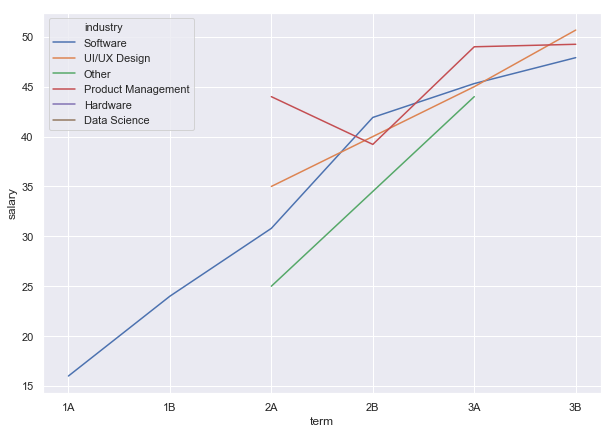

In [18]:
sns.set()
plt.subplots(figsize=(10,7))
sns.lineplot(x="term",y="salary",hue="industry",ci=None,data=usd)
plt.show()

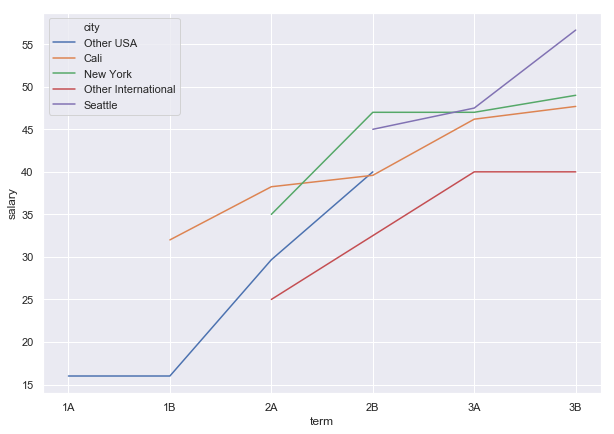

In [19]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="term",y="salary",hue="city",ci=None,data=usd)
plt.show()

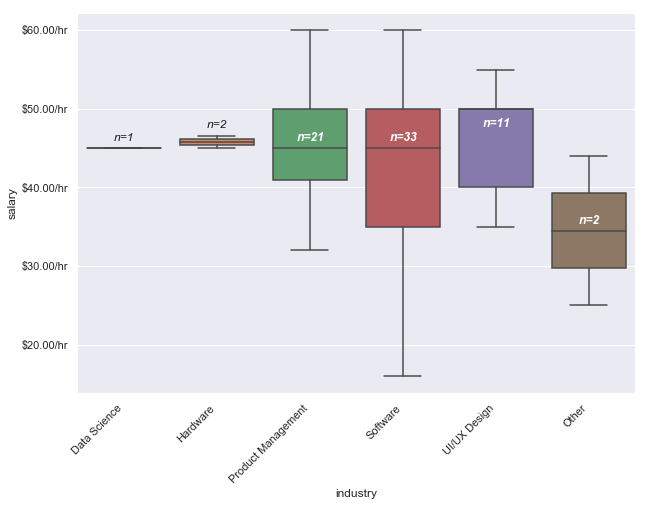

In [31]:
fig,ax=plt.subplots(figsize=(10,7))
p = sns.boxplot(x="industry",y="salary",order=industry_sorted,data=usd)
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
medians = usd.groupby(['industry'])['salary'].median()
medians_sorted = {}
for industry in industry_sorted:
    medians_sorted[industry] = medians[industry]
medians = pd.Series(medians_sorted)
v_offset = usd['salary'].median() * 0.02
ns = [usd['industry'].tolist().count(industry) for industry in industry_sorted]
for i,xtick in enumerate(p.get_xticks()):
    if i == 0:
        p.text(xtick,medians[xtick] + v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='k',style='italic',weight='regular')
    elif i == 1:
        p.text(xtick,medians[xtick] + 2*v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='k',style='italic',weight='regular')
    elif i == 4:
        p.text(xtick,medians[xtick] - 2.5*v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='w',style='italic',weight='semibold')
    else:
        p.text(xtick,medians[xtick] + v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='w',style='italic',weight='semibold')
fig.canvas.draw()
ylab = ['$'+str(lab.get_text())+'.00/hr' for lab in p.get_yticklabels()]
p.set_yticklabels(ylab)
plt.show()

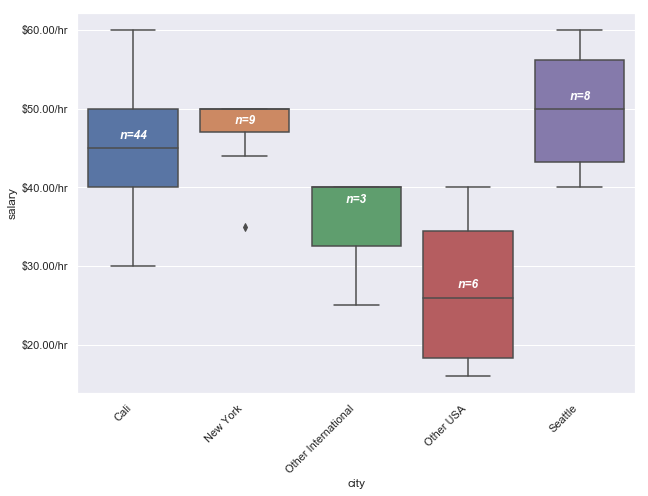

In [36]:
fig,ax=plt.subplots(figsize=(10,7))
p = sns.boxplot(x="city",y="salary",order=city_sorted,data=usd)
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
medians = usd.groupby(['city'])['salary'].median()
medians_sorted = {}
for city in city_sorted:
    medians_sorted[city] = medians[city]
medians = pd.Series(medians_sorted)
v_offset = usd['salary'].median() * 0.03
ns = [usd['city'].tolist().count(city) for city in city_sorted]
for i,xtick in enumerate(p.get_xticks()):
    if i == 1 or i == 2:
        p.text(xtick,medians[xtick] - 1.4* v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='w',style='italic',weight='semibold')
    else:
        p.text(xtick,medians[xtick] + 0.9*v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='w',style='italic',weight='semibold')
fig.canvas.draw()
ylab = ['$'+str(lab.get_text())+'.00/hr' for lab in p.get_yticklabels()]
p.set_yticklabels(ylab)
plt.show()

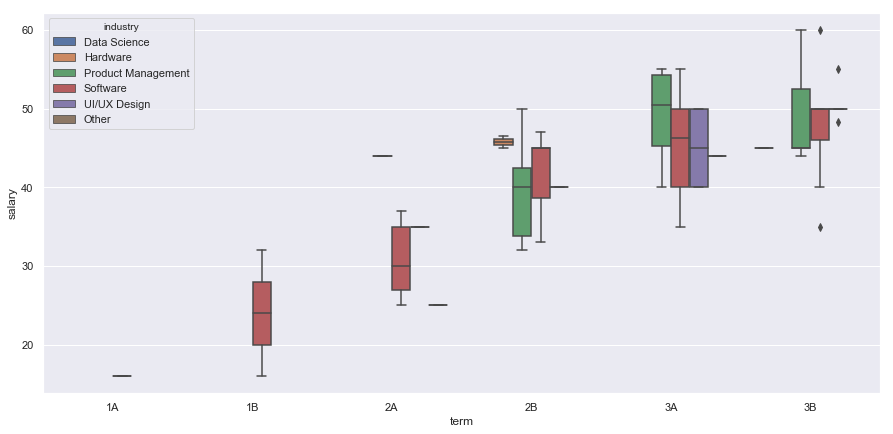

In [37]:
plt.subplots(figsize=(15,7))
sns.boxplot(x="term",y="salary",hue="industry",hue_order=industry_sorted,data=usd)
plt.show()

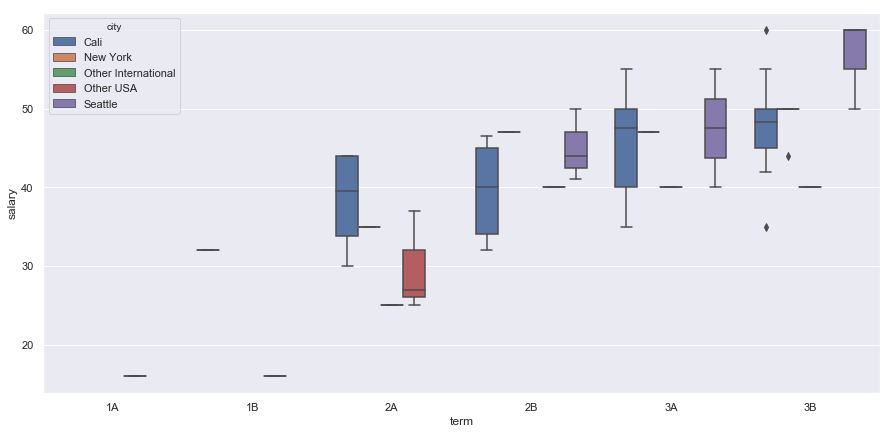

In [38]:
plt.subplots(figsize=(15,7))
sns.boxplot(x="term",y="salary",hue="city",hue_order=city_sorted,data=usd)
plt.show()